<h1 align=center><font size = 5>Covid19 Rate & Venues Data Analysis of San Francisco</font></h1>

In [1]:
import pandas as pd
import numpy as np
import requests

### Create covid19 rate choropleth map
Load covid data from csv file, infomation was last updated on JUL-02-2020

In [2]:
# The code was removed by Watson Studio for sharing.

,area_type,id,count,rate,deaths,acs_population,last_updated_at,multipolygon
0,ZCTA,94158,36.0,49.375943,0,7291,2020/07/02 03:00:16 PM,MULTIPOLYGON (((-122.38369599999997 37.7547009...
1,ZCTA,94131,74.0,24.747509,1,29902,2020/07/02 03:00:16 PM,MULTIPOLYGON (((-122.45400199999993 37.7587849...
2,ZCTA,94124,427.0,120.747674,5,35363,2020/07/02 03:00:16 PM,MULTIPOLYGON (((-122.39360405800001 37.7082676...
3,ZCTA,94107,151.0,50.860588,1,29689,2020/07/02 03:00:16 PM,MULTIPOLYGON (((-122.38530302599999 37.7898378...
4,ZCTA,94129,14.0,NaN,0,3994,2020/07/02 03:00:16 PM,MULTIPOLYGON (((-122.44812699999994 37.8068959...
5,ZCTA,94121,55.0,12.558511,1,43795,2020/07/02 03:00:16 PM,MULTIPOLYGON (((-122.48542599999998 37.7898249...
6,ZCTA,94108,21.0,14.432990,0,14550,2020/07/02 03:00:16 PM,MULTIPOLYGON (((-122.40461299999998 37.7935649...
7,ZCTA,94105,25.0,27.307482,0,9155,2020/07/02 03:00:16 PM,MULTIPOLYGON (((-122.39194156800001 37.7938709...
8,ZCTA,94103,219.0,76.213677,1,28735,2020/07/02 03:00:16 PM,MULTIPOLYGON (((-122.39781199999999 37.7846669...
9,ZCTA,94102,271.0,87.230824,4,31067,2020/07/02 03:00:16 PM,MULTIPOLYGON (((-122.40474300099999 37.7867779...


Clean the dataframe:

1.Replace NaN with count 0

2.Keep column of zipcode, confirmed rate and population of that zip

3.Change zipcode to string format

In [3]:
covid_df.fillna(0,inplace=True)

In [4]:
covid_df.drop(["area_type","count","deaths","acs_population","last_updated_at",'multipolygon'],axis=1,inplace=True)
covid_df.rename({"id":"ZIP_code"},axis='columns',inplace=True)

In [5]:
covid_df['ZIP_code'] = covid_df['ZIP_code'].astype(str)
covid_df

,ZIP_code,rate
0,94158,49.375943
1,94131,24.747509
2,94124,120.747674
3,94107,50.860588
4,94129,0.000000
5,94121,12.558511
6,94108,14.432990
7,94105,27.307482
8,94103,76.213677
9,94102,87.230824


Download geojson of sf and creat a choropleth map based on the confirmation rate

In [6]:
!wget --quiet https://earthworks.stanford.edu/download/file/stanford-df986nv4623-geojson.json -O sfgeo.json

In [8]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
world_geo = r'sfgeo.json'

# create a plain world map
world_map = folium.Map(location=[37.76, -122.42], zoom_start=12.5, tiles='Mapbox Bright')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

In [9]:
# generate choropleth map using the rate
world_map.choropleth(
    geo_data=world_geo,
    data=covid_df,
    columns=['ZIP_code', 'rate'],
    key_on='feature.properties.zip_code_5',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Covid19_Rates_in_SF'
)

# display map
world_map

### Clean venues type data grouped by neighborhood

Load sf map data

In [10]:
client_144fe74003e442269373b9d4cf28a0e0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ztQoqITfRzNnqnV1z-4eMPq6qD-97hD8grrsOVoJi7xH',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_144fe74003e442269373b9d4cf28a0e0.get_object(Bucket='courseradatascienceweek2lab-donotdelete-pr-xb7md7suivqkks',Key='Planning Neighborhood Groups Map.geojson')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
sfneigh = pd.read_json(body)
sfneigh = sfneigh['features']
sfneigh.head()

0    {'type': 'Feature', 'properties': {'neighborho...
1    {'type': 'Feature', 'properties': {'neighborho...
2    {'type': 'Feature', 'properties': {'neighborho...
3    {'type': 'Feature', 'properties': {'neighborho...
4    {'type': 'Feature', 'properties': {'neighborho...
Name: features, dtype: object

In [11]:
sfneigh[0]

{'type': 'Feature',
 'properties': {'neighborho': 'Seacliff'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-122.48408901116126, 37.78791033989035],
     [-122.48434628422403, 37.78765448917502],
     [-122.48743368226536, 37.787490957016445],
     [-122.48712304007017, 37.783759913823474],
     [-122.49252643147766, 37.78350142216405],
     [-122.49240684970657, 37.78166318301706],
     [-122.50531712907403, 37.780998168449486],
     [-122.50514356128036, 37.77977427652901],
     [-122.50619999564852, 37.779867834950835],
     [-122.50781825944091, 37.77995181679581],
     [-122.50950373886157, 37.77992309940351],
     [-122.50934216908757, 37.779145133454016],
     [-122.50909465418083, 37.775189985514395],
     [-122.51316877960349, 37.7750460677791],
     [-122.51317047464168, 37.77510860265329],
     [-122.51314951249371, 37.77520218000344],
     [-122.51316769617408, 37.7752950879423],
     [-122.51313873708119, 37.77538258692846],
     [-122.51315523708654, 37.7754

In [12]:
from statistics import mean

In [13]:
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Loop through the data and fill the dataframe one row at a time.

In [14]:
for data in sfneigh:
    neighborhood_name = data['properties']['neighborho']
    
    # use mean of all coordinates in the neighborhood to calculate the center
    # neighborhood_latlon = np.mean(np.array(data['geometry']['coordinates'][0][0]).T,axis=1)
    # neighborhood_lat = neighborhood_latlon[1]
    # neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Neighborhood': neighborhood_name,
                                          }, ignore_index=True)
    

In [15]:
neighborhoods['Neighborhood']

0                  Seacliff
1            Haight Ashbury
2             Outer Mission
3              Inner Sunset
4     Downtown/Civic Center
5           Diamond Heights
6                 Lakeshore
7              Russian Hill
8                Noe Valley
9       Treasure Island/YBI
10           Outer Richmond
11           Crocker Amazon
12                Excelsior
13                 Parkside
14       Financial District
15               Ocean View
16                  Mission
17       West of Twin Peaks
18           Inner Richmond
19                   Marina
20                  Bayview
21        Visitacion Valley
22          Pacific Heights
23         Presidio Heights
24          South of Market
25                Glen Park
26             Potrero Hill
27      Castro/Upper Market
28               Twin Peaks
29           Bernal Heights
30                 Presidio
31                 Nob Hill
32                Chinatown
33              North Beach
34             Outer Sunset
35         Western A

There are some problems using the mean coordinates as the neighborhood center. So I decided to use the coordinates for each neighborhood provided by google

In [16]:
body = client_144fe74003e442269373b9d4cf28a0e0.get_object(Bucket='courseradatascienceweek2lab-donotdelete-pr-xb7md7suivqkks',Key='neighbor_coor.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

neighborhoods = pd.read_excel(body)
neighborhoods['Longitude'] = -neighborhoods['Longitude']
neighborhoods

,Neighborhood,Latitude,Longitude
0,Seacliff,37.78590,-122.49070
1,Haight Ashbury,37.77050,-122.44860
2,Outer Mission,37.71570,-122.44580
3,Inner Sunset,37.76020,-122.47030
4,Downtown/Civic Center,37.78160,-122.41560
5,Diamond Heights,37.74240,-122.44250
6,Lakeshore,37.72330,-122.48870
7,Russian Hill,37.80110,-122.41940
8,Noe Valley,37.75020,-122.43370
9,Treasure Island/YBI,37.82360,-122.37060


In [17]:
print('The dataframe has {} neighborhoods.'.format(
        neighborhoods.shape[0]
    ))

The dataframe has 37 neighborhoods.


Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = 'NGK1Z1CH1O4HGJ4IIKHV2KGKEOVSWMJF3IN13GAPVWQAM1QI' # your Foursquare ID
CLIENT_SECRET = '3TOVDZD4CZYA2X5BS0W3O0BOSSVONJ5UTRG33LOX10IS4VKH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NGK1Z1CH1O4HGJ4IIKHV2KGKEOVSWMJF3IN13GAPVWQAM1QI
CLIENT_SECRET:3TOVDZD4CZYA2X5BS0W3O0BOSSVONJ5UTRG33LOX10IS4VKH


Create a function to utilizing the Foursquare API to explore the neighborhoods and segment them in SF

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Try radius of 500 meters

In [20]:
import requests
"""
LIMIT = 100
SF_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'],
                                   radius=500
                                  )
"""

"\nLIMIT = 100\nSF_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],\n                                   latitudes=neighborhoods['Latitude'],\n                                   longitudes=neighborhoods['Longitude'],\n                                   radius=500\n                                  )\n"

In [21]:
"""
print(SF_venues.shape)
SF_venues.head()
"""

'\nprint(SF_venues.shape)\nSF_venues.head()\n'

Check how many venues for each neighborhood

In [22]:
""" SF_venues.groupby('Neighborhood').count()['Venue']"""

" SF_venues.groupby('Neighborhood').count()['Venue']"

Check how many different categories of all venues

In [23]:
""" print('There are {} uniques categories.'.format(len(SF_venues['Venue Category'].unique()))) """

" print('There are {} uniques categories.'.format(len(SF_venues['Venue Category'].unique()))) "

Try radius of 1000 meters

In [24]:
"""LIMIT = 100
SF_venues_1000 = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'],
                                   radius=1000
                                  )
"""

"LIMIT = 100\nSF_venues_1000 = getNearbyVenues(names=neighborhoods['Neighborhood'],\n                                   latitudes=neighborhoods['Latitude'],\n                                   longitudes=neighborhoods['Longitude'],\n                                   radius=1000\n                                  )\n"

In [25]:

body = client_144fe74003e442269373b9d4cf28a0e0.get_object(Bucket='courseradatascienceweek2lab-donotdelete-pr-xb7md7suivqkks',Key='SF_venues_1000_LIMIT100.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

SF_venues_1000 = pd.read_csv(body)
SF_venues_1000.head()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Seacliff,37.7859,-122.4907,China Beach,37.788090,-122.491186,Beach
1,Seacliff,37.7859,-122.4907,Eagles Point,37.786714,-122.494810,Scenic Lookout
2,Seacliff,37.7859,-122.4907,Lincoln Park Stairs,37.783496,-122.493597,Trail
3,Seacliff,37.7859,-122.4907,Seacliff,37.788259,-122.486401,Neighborhood
4,Seacliff,37.7859,-122.4907,Pizzetta 211,37.783694,-122.482879,Pizza Place


In [26]:

print(SF_venues_1000.shape)
SF_venues_1000.groupby('Neighborhood').count()['Venue']

(3000, 7)


Neighborhood
Bayview                   40
Bernal Heights           100
Castro/Upper Market      100
Chinatown                100
Crocker Amazon            51
Diamond Heights           44
Downtown/Civic Center    100
Excelsior                 64
Financial District       100
Glen Park                100
Golden Gate Park          88
Haight Ashbury           100
Inner Richmond           100
Inner Sunset             100
Lakeshore                 26
Marina                   100
Mission                  100
Nob Hill                 100
Noe Valley                94
North Beach              100
Ocean View                39
Outer Mission             48
Outer Richmond           100
Outer Sunset             100
Pacific Heights          100
Parkside                 100
Potrero Hill             100
Presidio                  57
Presidio Heights         100
Russian Hill             100
Seacliff                  89
South of Market          100
Treasure Island/YBI       30
Twin Peaks                36
V

In [27]:

print('There are {} uniques categories.'.format(len(SF_venues_1000['Venue Category'].unique())))

There are 323 uniques categories.


In [28]:
# The code was removed by Watson Studio for sharing.

'\nfrom project_lib import Project\nproject = Project(project_id=\'4a650be8-e3e6-4a4f-887f-412c62749caf\', project_access_token=\'p-159f9987d46a9a079d9449d46926a8a69c66eff2\')\n\nproject.save_data(file_name = "SF_venues_1000_LIMIT100.csv",data = SF_venues_1000.to_csv(index=False))'

Analyzing neighborhoods depending on the venue categories

I chose to use 1000 meter radius for downstream analysis because the least number of venues a neighbohood has is 8, instead of 1 while using 500 radius.

First create neighborhood-categories one hot table

In [29]:
# one hot encoding
SF_onehot = pd.get_dummies(SF_venues_1000[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SF_onehot['Neighborhood'] = SF_venues_1000['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SF_onehot.columns[-1]] + list(SF_onehot.columns[:-1])
SF_onehot = SF_onehot[fixed_columns]

SF_onehot.head()

,Zoo Exhibit,ATM,Acai House,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Arcade,...,Video Store,Vietnamese Restaurant,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
SF_onehot.shape

(3000, 323)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [31]:
SF_grouped = SF_onehot.groupby('Neighborhood').mean().reset_index()
SF_grouped

,Neighborhood,Zoo Exhibit,ATM,Acai House,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,...,Video Store,Vietnamese Restaurant,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Bayview,0.00,0.00,0.00,0.00,0.00,0.025,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000
1,Bernal Heights,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.010000,0.000000,...,0.000000,0.010000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.020000
2,Castro/Upper Market,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000000,0.000000,...,0.000000,0.010000,0.000000,0.00,0.030000,0.000000,0.00,0.00,0.000000,0.020000
3,Chinatown,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.010000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.00,0.00,0.000000,0.020000
4,Crocker Amazon,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.019608,0.000000,...,0.000000,0.058824,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000
5,Diamond Heights,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000
6,Downtown/Civic Center,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.010000,0.000000,...,0.000000,0.040000,0.000000,0.00,0.010000,0.000000,0.00,0.00,0.000000,0.000000
7,Excelsior,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000000,0.000000,...,0.000000,0.031250,0.000000,0.00,0.000000,0.015625,0.00,0.00,0.000000,0.000000
8,Financial District,0.00,0.00,0.01,0.00,0.00,0.000,0.00,0.010000,0.000000,...,0.000000,0.020000,0.000000,0.01,0.030000,0.010000,0.00,0.00,0.000000,0.000000
9,Glen Park,0.00,0.01,0.00,0.00,0.00,0.000,0.01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000


Create the new dataframe and display the top 5 common venues type for each neighborhood.

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SF_grouped['Neighborhood']

for ind in np.arange(SF_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SF_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview,Southern / Soul Food Restaurant,Mexican Restaurant,Park,Light Rail Station,Bakery,Thrift / Vintage Store,Baseball Field,Theater,Grocery Store,Chinese Restaurant
1,Bernal Heights,Mexican Restaurant,Coffee Shop,Playground,Café,Cocktail Bar,Grocery Store,Italian Restaurant,Park,Bakery,Yoga Studio
2,Castro/Upper Market,Coffee Shop,Gay Bar,New American Restaurant,Seafood Restaurant,Wine Bar,Gym,Indian Restaurant,Park,Pizza Place,Dog Run
3,Chinatown,Coffee Shop,Pizza Place,Men's Store,Hotel,Café,Chinese Restaurant,Cocktail Bar,Park,New American Restaurant,Yoga Studio
4,Crocker Amazon,Mexican Restaurant,Pizza Place,Vietnamese Restaurant,Latin American Restaurant,Playground,Liquor Store,Sandwich Place,Grocery Store,Hot Dog Joint,Motel


### Cluster neighborhood based on venue types

Find the best k

Elbow 

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for i in range(1,neighborhoods.shape[0]+1):
    kclusters = i

    SF_grouped_clustering = SF_grouped.drop('Neighborhood', 1)

    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SF_grouped_clustering)

    sse.append(kmeans.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list(range(1,neighborhoods.shape[0]+1)), sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

plt.show()

<Figure size 600x600 with 1 Axes>

In [35]:
diff = []
for i in range(len(sse)-1):
    diff.append(sse[i]-sse[i+1])
diff.index(max(diff[5:]),5)

5

In [36]:
diff

[0.12519585006790324,
 0.06064356839656093,
 0.0962473540284785,
 0.028222421552830612,
 0.039628863167384676,
 0.051287036113765505,
 0.026420311724226653,
 0.03140730096524408,
 0.03880813447679826,
 0.03471507345324315,
 0.022018677894667216,
 0.027331618775099153,
 0.022129061048230092,
 0.0259161554891702,
 0.02227295309582586,
 0.018778275660512794,
 0.020829804599274443,
 0.012684397163120587,
 0.017516210619996198,
 0.01223568389057747,
 0.013833333333333364,
 0.01075106382978723,
 0.010463945578231285,
 0.011248936170212775,
 0.011307488884860023,
 0.010274989144594016,
 0.00909999999999999,
 0.008899999999999991,
 0.008800000000000002,
 0.008300000000000002,
 0.007600000000000006,
 0.007214893617021278,
 0.004999999999999996,
 0.00462712658592849,
 0.004334446408281783,
 0.0027]

This means strating from sum of squared distance < 0.5, k=6 -> k=7 gives the largest decrease of adding one cluster.

Select k as 7

In [37]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 7

SF_grouped_clustering = SF_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SF_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:37] 

array([0, 1, 1, 1, 4, 5, 1, 4, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 4,
       3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 6, 2, 0, 1, 1], dtype=int32)

In [38]:
kmeans.inertia_

0.4675198824082364

In [39]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop(columns= 'Cluster Labels',inplace=True)
except:
    pass
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SF_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
SF_merged = SF_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

SF_merged # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Seacliff,37.78590,-122.49070,3,Café,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Korean Restaurant,Seafood Restaurant,Thai Restaurant,Vietnamese Restaurant,Pizza Place,Scenic Lookout
1,Haight Ashbury,37.77050,-122.44860,1,Park,Café,Coffee Shop,Bookstore,Mexican Restaurant,Boutique,Breakfast Spot,Playground,Shoe Store,Pizza Place
2,Outer Mission,37.71570,-122.44580,4,Mexican Restaurant,Pizza Place,Latin American Restaurant,Vietnamese Restaurant,Sandwich Place,Liquor Store,Hot Dog Joint,Bus Station,Gastropub,Gas Station
3,Inner Sunset,37.76020,-122.47030,3,Vietnamese Restaurant,Bakery,Sushi Restaurant,Coffee Shop,Garden,Pizza Place,Deli / Bodega,Thai Restaurant,Sandwich Place,Ice Cream Shop
4,Downtown/Civic Center,37.78160,-122.41560,1,Coffee Shop,Marijuana Dispensary,Theater,Bakery,Vietnamese Restaurant,Cocktail Bar,Beer Bar,Thai Restaurant,Music Venue,Sandwich Place
5,Diamond Heights,37.74240,-122.44250,5,Park,Playground,Trail,Theater,Pharmacy,Coffee Shop,Scenic Lookout,Grocery Store,Bus Station,Tennis Court
6,Lakeshore,37.72330,-122.48870,1,Lake,Golf Course,Sandwich Place,Gym,Park,Performing Arts Venue,Candy Store,Tennis Court,Thai Restaurant,Gym Pool
7,Russian Hill,37.80110,-122.41940,1,Park,Italian Restaurant,Bar,Coffee Shop,Pizza Place,Playground,Sushi Restaurant,Ice Cream Shop,Café,National Park
8,Noe Valley,37.75020,-122.43370,1,Coffee Shop,Café,Gift Shop,Trail,Park,Pizza Place,Playground,Bookstore,Sushi Restaurant,Bakery
9,Treasure Island/YBI,37.82360,-122.37060,6,Food Truck,Athletics & Sports,Bus Station,Music Venue,Baseball Field,Harbor / Marina,Island,Rugby Pitch,Park,Flea Market


Visualize clustering data on map

In [40]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[37.76, -122.42], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SF_merged['Latitude'], SF_merged['Longitude'], SF_merged['Neighborhood'], SF_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster annotation

Cluster 0 is a mix-cultured cluster with many parks

In [41]:
SF_merged.loc[SF_merged['Cluster Labels'] == 0, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Bayview,Southern / Soul Food Restaurant,Mexican Restaurant,Park,Light Rail Station,Bakery,Thrift / Vintage Store,Baseball Field,Theater,Grocery Store,Chinese Restaurant
21,Visitacion Valley,Light Rail Station,Park,Breakfast Spot,Bakery,Café,Garden,Coffee Shop,Marijuana Dispensary,Donut Shop,Art Gallery


Cluster 1 is a mix-cultured cluster with many parks and bars. Most restaurants are Mexican, Italian and Mew american style.

In [42]:
SF_merged.loc[SF_merged['Cluster Labels'] == 1, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Haight Ashbury,Park,Café,Coffee Shop,Bookstore,Mexican Restaurant,Boutique,Breakfast Spot,Playground,Shoe Store,Pizza Place
4,Downtown/Civic Center,Coffee Shop,Marijuana Dispensary,Theater,Bakery,Vietnamese Restaurant,Cocktail Bar,Beer Bar,Thai Restaurant,Music Venue,Sandwich Place
6,Lakeshore,Lake,Golf Course,Sandwich Place,Gym,Park,Performing Arts Venue,Candy Store,Tennis Court,Thai Restaurant,Gym Pool
7,Russian Hill,Park,Italian Restaurant,Bar,Coffee Shop,Pizza Place,Playground,Sushi Restaurant,Ice Cream Shop,Café,National Park
8,Noe Valley,Coffee Shop,Café,Gift Shop,Trail,Park,Pizza Place,Playground,Bookstore,Sushi Restaurant,Bakery
13,Parkside,Seafood Restaurant,Coffee Shop,Ice Cream Shop,Bakery,Café,Tour Provider,Park,American Restaurant,Italian Restaurant,Trail
14,Financial District,Coffee Shop,Food Truck,Bookstore,New American Restaurant,Seafood Restaurant,Japanese Restaurant,Men's Store,Gym,Wine Bar,Park
16,Mission,Mexican Restaurant,Café,New American Restaurant,Coffee Shop,Bar,Music Venue,Cocktail Bar,Yoga Studio,Bookstore,Boxing Gym
17,West of Twin Peaks,Coffee Shop,Park,Burger Joint,Pizza Place,Pharmacy,Italian Restaurant,Wine Bar,Cosmetics Shop,Grocery Store,Pub
19,Marina,Gym / Fitness Center,Park,French Restaurant,Sandwich Place,Wine Bar,Mexican Restaurant,Coffee Shop,Bookstore,Juice Bar,Thai Restaurant


Cluster 2 is a mountain spot

In [43]:
SF_merged.loc[SF_merged['Cluster Labels'] == 2, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Twin Peaks,Trail,Park,Scenic Lookout,Playground,Yoga Studio,Hill,Grocery Store,Garden,Monument / Landmark,Mountain


Cluster 3 has many Asian restaurants, expecially Chinese-style restaurants.

In [44]:
SF_merged.loc[SF_merged['Cluster Labels'] == 3, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Seacliff,Café,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Korean Restaurant,Seafood Restaurant,Thai Restaurant,Vietnamese Restaurant,Pizza Place,Scenic Lookout
3,Inner Sunset,Vietnamese Restaurant,Bakery,Sushi Restaurant,Coffee Shop,Garden,Pizza Place,Deli / Bodega,Thai Restaurant,Sandwich Place,Ice Cream Shop
10,Outer Richmond,Café,Chinese Restaurant,Vietnamese Restaurant,Bakery,Grocery Store,Pizza Place,Sushi Restaurant,Korean Restaurant,Japanese Restaurant,Playground
15,Ocean View,Grocery Store,Café,Intersection,Bakery,Playground,Chinese Restaurant,Convenience Store,Liquor Store,Light Rail Station,Garden
18,Inner Richmond,Bakery,Japanese Restaurant,Chinese Restaurant,Korean Restaurant,Sushi Restaurant,Asian Restaurant,Coffee Shop,Burmese Restaurant,Thai Restaurant,Vietnamese Restaurant
25,Glen Park,Park,Pizza Place,Café,Trail,Breakfast Spot,Convenience Store,Chinese Restaurant,Coffee Shop,Bakery,Mexican Restaurant
30,Presidio,Trail,Café,Park,Food Truck,Tunnel,General Entertainment,Museum,Scenic Lookout,Baseball Field,Beach
34,Outer Sunset,Chinese Restaurant,Sandwich Place,Bubble Tea Shop,Dumpling Restaurant,Café,Pharmacy,Japanese Restaurant,Korean Restaurant,Bakery,Coffee Shop
36,Golden Gate Park,Chinese Restaurant,Park,Bubble Tea Shop,Vietnamese Restaurant,Bakery,Grocery Store,Dumpling Restaurant,Lake,Playground,Thrift / Vintage Store


Cluster 4 has many mexican, latin american, and vietnamese resturants.

In [45]:
SF_merged.loc[SF_merged['Cluster Labels'] == 4, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Outer Mission,Mexican Restaurant,Pizza Place,Latin American Restaurant,Vietnamese Restaurant,Sandwich Place,Liquor Store,Hot Dog Joint,Bus Station,Gastropub,Gas Station
11,Crocker Amazon,Mexican Restaurant,Pizza Place,Vietnamese Restaurant,Latin American Restaurant,Playground,Liquor Store,Sandwich Place,Grocery Store,Hot Dog Joint,Motel
12,Excelsior,Mexican Restaurant,Latin American Restaurant,Deli / Bodega,Convenience Store,Grocery Store,Restaurant,Pizza Place,Chinese Restaurant,Park,Vietnamese Restaurant


Cluster 5 has many parks and playgrounds

In [46]:
SF_merged.loc[SF_merged['Cluster Labels'] == 5, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Diamond Heights,Park,Playground,Trail,Theater,Pharmacy,Coffee Shop,Scenic Lookout,Grocery Store,Bus Station,Tennis Court


Cluster 6 is an island.

In [47]:
SF_merged.loc[SF_merged['Cluster Labels'] == 6, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Treasure Island/YBI,Food Truck,Athletics & Sports,Bus Station,Music Venue,Baseball Field,Harbor / Marina,Island,Rugby Pitch,Park,Flea Market


Generate the final neighborhood-based covid19 confirmation map

In [48]:
# create choropleth map
final_map = folium.Map(location=[37.76, -122.42], zoom_start=12.5,tiles='Mapbox Bright')


final_map.choropleth(
    geo_data=world_geo,
    data=covid_df,
    columns=['ZIP_code', 'rate'],
    key_on='feature.properties.zip_code_5',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Covid19_Rates_in_SF'
)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SF_merged['Latitude'], SF_merged['Longitude'], SF_merged['Neighborhood'], SF_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(final_map)
    
final_map

## More features

What if we consider two more features:

1.Resturant Average Price

2.Housing Average Price

In [49]:
body = client_144fe74003e442269373b9d4cf28a0e0.get_object(Bucket='courseradatascienceweek2lab-donotdelete-pr-xb7md7suivqkks',Key='Housing price index.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

HouseIndex = pd.read_excel(body)
HouseIndex.head()

,Neighborhood,Home value index
0,Seacliff,4203253
1,Haight Ashbury,1722314
2,Outer Mission,1073887
3,Inner Sunset,1775304
4,Downtown/Civic Center,930025


In [50]:
SF_grouped.merge(HouseIndex,on='Neighborhood')

,Neighborhood,Zoo Exhibit,ATM,Acai House,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,...,Vietnamese Restaurant,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Home value index
0,Bayview,0.00,0.00,0.00,0.00,0.00,0.025,0.00,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,1032682
1,Bernal Heights,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.010000,0.000000,...,0.010000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.020000,1587365
2,Castro/Upper Market,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000000,0.000000,...,0.010000,0.000000,0.00,0.030000,0.000000,0.00,0.00,0.000000,0.020000,1514888
3,Chinatown,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.010000,0.000000,...,0.000000,0.000000,0.00,0.020000,0.000000,0.00,0.00,0.000000,0.020000,1623693
4,Crocker Amazon,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.019608,0.000000,...,0.058824,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,1136531
5,Diamond Heights,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,1427401
6,Downtown/Civic Center,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.010000,0.000000,...,0.040000,0.000000,0.00,0.010000,0.000000,0.00,0.00,0.000000,0.000000,930025
7,Excelsior,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000000,0.000000,...,0.031250,0.000000,0.00,0.000000,0.015625,0.00,0.00,0.000000,0.000000,1157135
8,Financial District,0.00,0.00,0.01,0.00,0.00,0.000,0.00,0.010000,0.000000,...,0.020000,0.000000,0.01,0.030000,0.010000,0.00,0.00,0.000000,0.000000,1131762
9,Glen Park,0.00,0.01,0.00,0.00,0.00,0.000,0.01,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,1736050


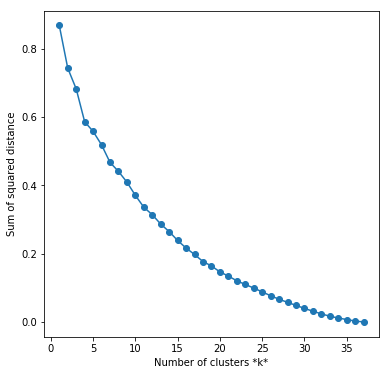

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for i in range(1,neighborhoods.shape[0]+1):
    kclusters = i

    SF_grouped_clustering = SF_grouped.drop('Neighborhood', 1)

    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SF_grouped_clustering)

    sse.append(kmeans.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list(range(1,neighborhoods.shape[0]+1)), sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

plt.show()

In [52]:
diff2 = []
for i in range(len(sse)-1):
    diff2.append(sse[i]-sse[i+1])

In [53]:
diff2.index(max(diff[5:]),5)

5

In [54]:
diff2 == diff

True

Adding home value index does not change the clustering result, but gives us some new understanding of the clusters.

## Cluster Annotation

Cluster 0 has a relatively low home value index. 

In [55]:
print(np.mean(SF_merged.loc[SF_merged['Cluster Labels'] == 0, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]].reset_index().merge(HouseIndex, on='Neighborhood')['Home value index']))
SF_merged.loc[SF_merged['Cluster Labels'] == 0, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]].reset_index().merge(HouseIndex, on='Neighborhood')

1001929.0


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Home value index
0,20,Bayview,Southern / Soul Food Restaurant,Mexican Restaurant,Park,Light Rail Station,Bakery,Thrift / Vintage Store,Baseball Field,Theater,Grocery Store,Chinese Restaurant,1032682
1,21,Visitacion Valley,Light Rail Station,Park,Breakfast Spot,Bakery,Café,Garden,Coffee Shop,Marijuana Dispensary,Donut Shop,Art Gallery,971176


Cluster 1 is a mix-cultured cluster with many parks and bars. Most restaurants are Mexican, Italian and Mew american style.

In [56]:
print(np.mean(SF_merged.loc[SF_merged['Cluster Labels'] == 1, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]].reset_index().merge(HouseIndex, on='Neighborhood')['Home value index']))
SF_merged.loc[SF_merged['Cluster Labels'] == 1, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]].reset_index().merge(HouseIndex, on='Neighborhood')

1679743.6


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Home value index
0,1,Haight Ashbury,Park,Café,Coffee Shop,Bookstore,Mexican Restaurant,Boutique,Breakfast Spot,Playground,Shoe Store,Pizza Place,1722314
1,4,Downtown/Civic Center,Coffee Shop,Marijuana Dispensary,Theater,Bakery,Vietnamese Restaurant,Cocktail Bar,Beer Bar,Thai Restaurant,Music Venue,Sandwich Place,930025
2,6,Lakeshore,Lake,Golf Course,Sandwich Place,Gym,Park,Performing Arts Venue,Candy Store,Tennis Court,Thai Restaurant,Gym Pool,389712
3,7,Russian Hill,Park,Italian Restaurant,Bar,Coffee Shop,Pizza Place,Playground,Sushi Restaurant,Ice Cream Shop,Café,National Park,1838217
4,8,Noe Valley,Coffee Shop,Café,Gift Shop,Trail,Park,Pizza Place,Playground,Bookstore,Sushi Restaurant,Bakery,2180031
5,13,Parkside,Seafood Restaurant,Coffee Shop,Ice Cream Shop,Bakery,Café,Tour Provider,Park,American Restaurant,Italian Restaurant,Trail,1462524
6,14,Financial District,Coffee Shop,Food Truck,Bookstore,New American Restaurant,Seafood Restaurant,Japanese Restaurant,Men's Store,Gym,Wine Bar,Park,1131762
7,16,Mission,Mexican Restaurant,Café,New American Restaurant,Coffee Shop,Bar,Music Venue,Cocktail Bar,Yoga Studio,Bookstore,Boxing Gym,1506592
8,17,West of Twin Peaks,Coffee Shop,Park,Burger Joint,Pizza Place,Pharmacy,Italian Restaurant,Wine Bar,Cosmetics Shop,Grocery Store,Pub,1506592
9,19,Marina,Gym / Fitness Center,Park,French Restaurant,Sandwich Place,Wine Bar,Mexican Restaurant,Coffee Shop,Bookstore,Juice Bar,Thai Restaurant,2402845


Cluster 2 is a mountain spot

In [57]:
print(np.mean(SF_merged.loc[SF_merged['Cluster Labels'] == 2, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]].reset_index().merge(HouseIndex, on='Neighborhood')['Home value index']))
SF_merged.loc[SF_merged['Cluster Labels'] == 2, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]].reset_index().merge(HouseIndex, on='Neighborhood')

0.0


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Home value index
0,28,Twin Peaks,Trail,Park,Scenic Lookout,Playground,Yoga Studio,Hill,Grocery Store,Garden,Monument / Landmark,Mountain,0


Cluster 3 has many Asian restaurants, expecially Chinese-style restaurants.

In [58]:
print(np.mean(SF_merged.loc[SF_merged['Cluster Labels'] == 3, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]].reset_index().merge(HouseIndex, on='Neighborhood')['Home value index'][:8]))
SF_merged.loc[SF_merged['Cluster Labels'] == 3, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]].reset_index().merge(HouseIndex, on='Neighborhood')

2069239.0


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Home value index
0,0,Seacliff,Café,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Korean Restaurant,Seafood Restaurant,Thai Restaurant,Vietnamese Restaurant,Pizza Place,Scenic Lookout,4203253
1,3,Inner Sunset,Vietnamese Restaurant,Bakery,Sushi Restaurant,Coffee Shop,Garden,Pizza Place,Deli / Bodega,Thai Restaurant,Sandwich Place,Ice Cream Shop,1775304
2,10,Outer Richmond,Café,Chinese Restaurant,Vietnamese Restaurant,Bakery,Grocery Store,Pizza Place,Sushi Restaurant,Korean Restaurant,Japanese Restaurant,Playground,1638102
3,15,Ocean View,Grocery Store,Café,Intersection,Bakery,Playground,Chinese Restaurant,Convenience Store,Liquor Store,Light Rail Station,Garden,1085615
4,18,Inner Richmond,Bakery,Japanese Restaurant,Chinese Restaurant,Korean Restaurant,Sushi Restaurant,Asian Restaurant,Coffee Shop,Burmese Restaurant,Thai Restaurant,Vietnamese Restaurant,2139254
5,25,Glen Park,Park,Pizza Place,Café,Trail,Breakfast Spot,Convenience Store,Chinese Restaurant,Coffee Shop,Bakery,Mexican Restaurant,1736050
6,30,Presidio,Trail,Café,Park,Food Truck,Tunnel,General Entertainment,Museum,Scenic Lookout,Baseball Field,Beach,2549839
7,34,Outer Sunset,Chinese Restaurant,Sandwich Place,Bubble Tea Shop,Dumpling Restaurant,Café,Pharmacy,Japanese Restaurant,Korean Restaurant,Bakery,Coffee Shop,1426495
8,36,Golden Gate Park,Chinese Restaurant,Park,Bubble Tea Shop,Vietnamese Restaurant,Bakery,Grocery Store,Dumpling Restaurant,Lake,Playground,Thrift / Vintage Store,0


Cluster 4 has many mexican, latin american, and vietnamese resturants, relatively low home value index

In [59]:
print(np.mean(SF_merged.loc[SF_merged['Cluster Labels'] == 4, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]].reset_index().merge(HouseIndex, on='Neighborhood')['Home value index']))
SF_merged.loc[SF_merged['Cluster Labels'] == 4, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]].reset_index().merge(HouseIndex, on='Neighborhood')

1122517.6666666667


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Home value index
0,2,Outer Mission,Mexican Restaurant,Pizza Place,Latin American Restaurant,Vietnamese Restaurant,Sandwich Place,Liquor Store,Hot Dog Joint,Bus Station,Gastropub,Gas Station,1073887
1,11,Crocker Amazon,Mexican Restaurant,Pizza Place,Vietnamese Restaurant,Latin American Restaurant,Playground,Liquor Store,Sandwich Place,Grocery Store,Hot Dog Joint,Motel,1136531
2,12,Excelsior,Mexican Restaurant,Latin American Restaurant,Deli / Bodega,Convenience Store,Grocery Store,Restaurant,Pizza Place,Chinese Restaurant,Park,Vietnamese Restaurant,1157135


Cluster 5 has many parks and playgrounds

In [60]:
SF_merged.loc[SF_merged['Cluster Labels'] == 5, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]].reset_index().merge(HouseIndex, on='Neighborhood')

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Home value index
0,5,Diamond Heights,Park,Playground,Trail,Theater,Pharmacy,Coffee Shop,Scenic Lookout,Grocery Store,Bus Station,Tennis Court,1427401


Cluster 6 is an island.

In [61]:
SF_merged.loc[SF_merged['Cluster Labels'] == 6, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]].reset_index().merge(HouseIndex, on='Neighborhood')

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Home value index
0,9,Treasure Island/YBI,Food Truck,Athletics & Sports,Bus Station,Music Venue,Baseball Field,Harbor / Marina,Island,Rugby Pitch,Park,Flea Market,0
